<a href="https://colab.research.google.com/github/donnysbeu/Pemograman_Python/blob/main/TUGAS11_Donny%20Setiawan%20Beu_1101194157.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
cd /content/drive/MyDrive/TUGAS_11_Donny

/content/drive/MyDrive/TUGAS_11_Donny


In [140]:
ls

dataset/  nnmodel_scene/


In [142]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [157]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [158]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((192, 192))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [159]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [160]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [161]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [162]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(380, 192, 192, 3)
(127, 192, 192, 3)


In [163]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(16, (5,5), activation='relu', input_shape=(192,192,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 188, 188, 16)      1216      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 94, 94, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 92, 92, 16)        2320      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 46, 46, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 44, 44, 32)        4640      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 20, 20, 32)       

In [165]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [166]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=32)

Epoch 1/30
12/12 [==============================] - 12s 1s/step - loss: 1.5871 - accuracy: 0.2342 - val_loss: 1.5892 - val_accuracy: 0.1496
Epoch 2/30
12/12 [==============================] - 12s 1s/step - loss: 1.5181 - accuracy: 0.3658 - val_loss: 1.4852 - val_accuracy: 0.4173
Epoch 3/30
12/12 [==============================] - 13s 1s/step - loss: 1.3759 - accuracy: 0.4368 - val_loss: 1.2640 - val_accuracy: 0.5118
Epoch 4/30
12/12 [==============================] - 13s 1s/step - loss: 1.1644 - accuracy: 0.5500 - val_loss: 1.1530 - val_accuracy: 0.4882
Epoch 5/30
12/12 [==============================] - 13s 1s/step - loss: 0.9815 - accuracy: 0.6026 - val_loss: 1.0051 - val_accuracy: 0.6614
Epoch 6/30
12/12 [==============================] - 13s 1s/step - loss: 0.8546 - accuracy: 0.6447 - val_loss: 1.0451 - val_accuracy: 0.5827
Epoch 7/30
12/12 [==============================] - 12s 1s/step - loss: 0.7612 - accuracy: 0.7316 - val_loss: 0.9831 - val_accuracy: 0.6142
Epoch 8/30
12/12 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


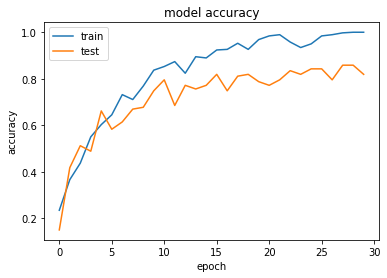

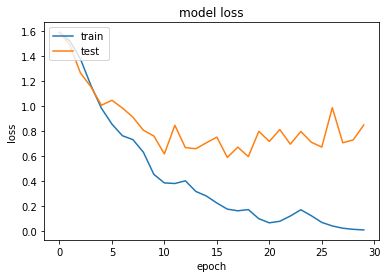

In [168]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [169]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.58      0.74      0.65        19
      GMB_02       0.81      0.89      0.85        28
      GMB_03       0.96      0.83      0.89        29
      GMB_04       0.86      0.92      0.89        39
      GMB_05       1.00      0.42      0.59        12

    accuracy                           0.82       127
   macro avg       0.84      0.76      0.77       127
weighted avg       0.84      0.82      0.82       127



In [175]:
model1.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [176]:
import cv2
import matplotlib.pyplot as plt
image1='tes_daun.jpg'

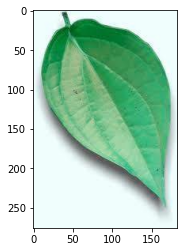

In [177]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [178]:
image_testing = Image.open('tes_daun.jpg')
image_testing = np.array(image_testing.resize((192, 192))) / 255.0
image_testing.shape 

(192, 192, 3)

In [179]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 192, 192, 3)


In [180]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[2.4389714e-05 5.8123582e-09 8.5228635e-04 9.9912328e-01 2.1509687e-09]]
['GMB_04']
